# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.  
    b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
    c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
    d. Plot the actual values against your model's estimates for the mean life expectancy.  
    e. Inspect the R-squared value for the model. does it make sense, given the plot?  

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
    a. What coefficients do you get? Interpret the meaning of those coefficients.  
    b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  
    c. Are the coefficients statistically significant?  
    d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?
    e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

3. Now, fit a model for life expectancy based on the log of gdp per capita.  
    a. Inspect the coefficients for this model. Are they statistically significant?
    b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?
    c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

4. Finally, return to the full dataset. 
    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [23]:
gdp_le['Year']

0       2021
1       2020
2       2019
3       2018
4       2017
        ... 
5499    1994
5500    1993
5501    1992
5502    1991
5503    1990
Name: Year, Length: 5504, dtype: int64

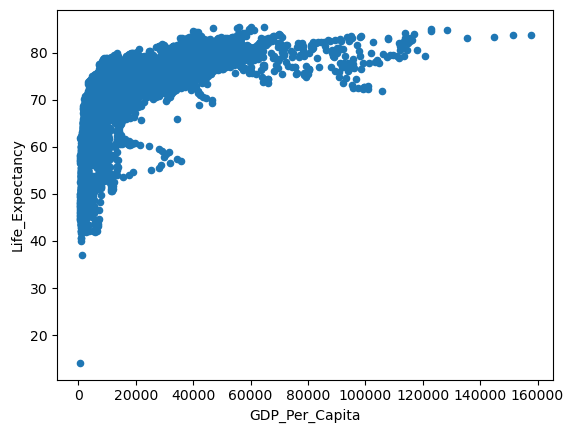

In [6]:
gdp_le.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy");

In [8]:
import statsmodels.formula.api as smf

In [9]:
lr_gdp_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [12]:
lr_gdp_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

In [14]:
gdp_le_after_1990 = gdp_le[gdp_le['Year'] >= 1990]
gdp_le_after_1990['Year']

0       2021
1       2020
2       2019
3       2018
4       2017
        ... 
5499    1994
5500    1993
5501    1992
5502    1991
5503    1990
Name: Year, Length: 5504, dtype: int64

In [16]:
lr_gdp_le_1990 = smf.ols("Life_Expectancy ~ Year", data=gdp_le_after_1990).fit()

In [18]:
lr_gdp_le_1990.params

Intercept   -468.138140
Year           0.267722
dtype: float64

In [33]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_df['mean_estimate'] = lr_gdp_le.predict(pred_df)

pred_df.head(2)

,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728


In [39]:
Year = 1990
estimate = lr_gdp_le.params['Intercept'] + lr_gdp_le.params['Year']*Year
estimate

64.62888940412671

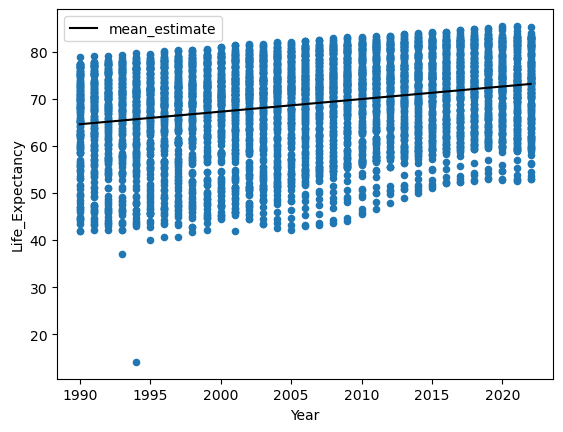

In [47]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);